# hw 1
## Shadrunov Aleksey, BIB201

## task 1

In [87]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

Какое количество мужчин и женщин ехало на корабле?

In [88]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [89]:
males = titanic[titanic.Sex == "male"].count().Name
females = titanic[titanic.Sex == "female"].count().Name
total = titanic.count().Name
pd.DataFrame({"male": [males], "female": [females], "total": [total]})

,male,female,total
0,577,314,891


Какой части пассажиров удалось выжить? Посчитайте долю выживших пассажиров.

In [90]:
survived = titanic.Survived.sum()
pd.DataFrame({"survived": [survived], "total": [total], "proportion": [round(survived / total, 2)]})

,survived,total,proportion
0,342,891,0.38


Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [91]:
first = titanic[titanic.Pclass == 1].count().Name
pd.DataFrame({"first": [first], "total": [total], "proportion": [round(first / total, 2)]})

,first,total,proportion
0,216,891,0.24


Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.

In [92]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Коррелируют ли число братьев/сестер/супругов с числом родителей/детей?
Посчитайте корреляцию Пирсона между признаками SibSp и Parch.

In [93]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 3)

In [94]:
pearsonr(titanic.SibSp, titanic.Parch)

PearsonRResult(statistic=0.4148376986201561, pvalue=2.2418236681384912e-38)

In [95]:
sibsp = list(set(titanic.SibSp))
parch = list(set(titanic.Parch))
res = []

for s in sibsp:
    for p in parch:
        res.append((s, p, titanic[(titanic.SibSp == s) & (titanic.Parch == p)].count().Name))

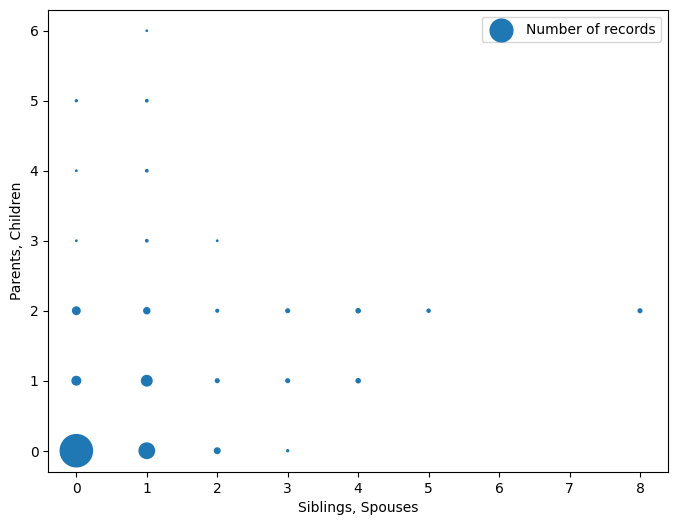

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter([i[0] for i in res], [i[1] for i in res], s=[i[2] for i in res], label='Number of records')
plt.xlabel("Siblings, Spouses")
plt.ylabel("Parents, Children")
plt.legend(loc="upper right")
# plt.set_size_inches(18.5, 10.5)
plt.show()

Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name).

In [97]:
def filter_name(x: str) -> str:
    """filter First Name from dataset

    :param x: Full Name
    :type x: str
    :return: First Name
    :rtype: str
    """
    # every line has Surname + Mrs. or Miss. + Names
    # hence cut everything before dot
    x = x.split(".")[1].strip()
    # Mrs' names are in brackets
    if "(" in x:
        x = x.split("(")[1][:-1]  # remove closing bracket
    # remove "nickname"
    x = x.split('"')[0].strip()
    # select first word
    x = x.split(" ")[0]
    return x


In [98]:
# pd.set_option("display.max_colwidth", None)
names = titanic[titanic.Sex == "female"].Name
names = names.apply(filter_name)
names = names[names != ""]
names.head(50)

1        Florence
2           Laina
3            Lily
8       Elisabeth
9           Adele
10     Marguerite
11      Elizabeth
14          Hulda
15           Mary
18         Emelia
19         Fatima
22           Anna
24        Torborg
25          Selma
28          Ellen
31          Marie
32           Mary
38        Augusta
39         Jamila
40        Johanna
41        Dorothy
43        Simonne
44       Margaret
47        Bridget
49       Josefine
52           Myna
53      Elizabeth
56          Emily
58      Constance
61         Amelie
66      Elizabeth
68           Erna
71        Lillian
79      Elizabeth
82        Brigdet
84         Bertha
85          Maria
88          Mabel
98            Ada
100       Matilda
106          Anna
109        Bertha
111        Hileni
113      Katriina
114        Malake
119         Ellis
123         Susan
128          Anna
132         Grace
133      Mathilde
Name: Name, dtype: object

In [99]:
# names.mode()
names.value_counts()[:10]

Anna         15
Mary         14
Elizabeth    11
Margaret     10
Alice         6
Helen         5
Bertha        5
Florence      4
Marie         4
Catherine     4
Name: Name, dtype: int64

## task 2

In [100]:
from math import sin, exp
import numpy as np
from scipy.linalg import solve

Polynomial $g(x)$

In [101]:
def g(x: float, A: list) -> float:
    return sum([A[i][0] * (x ** i) for i in range(len(A))])

Given function

In [102]:
def f(x: float) -> float:
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


In [103]:
x_axis = np.linspace(1, 15, num=60)

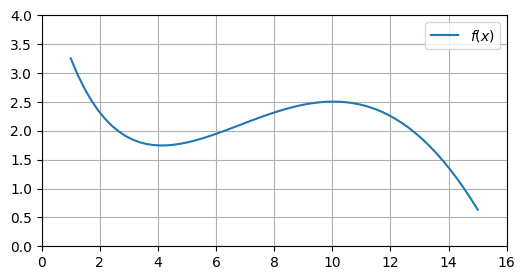

In [104]:
plt.plot(x_axis, [f(x) for x in x_axis], label="$f(x)$")
plt.axis([0, 16, 0, 4])
plt.grid()
plt.legend()
plt.show()

Приблизим функцию $f$ в точках 1 и 15 многочленом первой степени

$$
\left\{ 
\begin{align*} 
a_0 + a_1 x_1 &=  f(x_1) \\ 
a_0 + a_1 x_2 &=  f(x_2)
\end{align*}
\right.
$$
$$
\\ \ \\
\left\{ 
\begin{align*} 
a_0 + a_1 \cdot 1 &= 3.252 \\ 
a_0 + a_1 \cdot 15 &= 0.635
\end{align*}
\right.
\\ \ \\
\begin{pmatrix}
1 & 1\\
1 & 15
\end{pmatrix} \cdot 
\begin{pmatrix}
a_0\\
a_1
\end{pmatrix} = 
\begin{pmatrix}
3.252\\
0.635
\end{pmatrix}
\\ \ \\
A = \begin{pmatrix}
1 & 1\\
1 & 15
\end{pmatrix}, \ 
b = \begin{pmatrix}
3.252\\
0.635
\end{pmatrix}
$$

In [105]:
X = [1, 15]  # точки, в которых аппроксимируется функция
n = len(X)  # degree of a polynomial
A, b = [], []  # matrices
for x in X:
    A.append([x ** i for i in range(n)])
    b.append([f(x)])
print("A =", A)
print("b =", b)

A = [[1, 1], [1, 15]]
b = [[3.252216865271419], [0.6352214195786656]]


In [106]:
# find coefficients:
R = solve(A, b)
R

array([[ 3.43914511],
       [-0.18692825]])

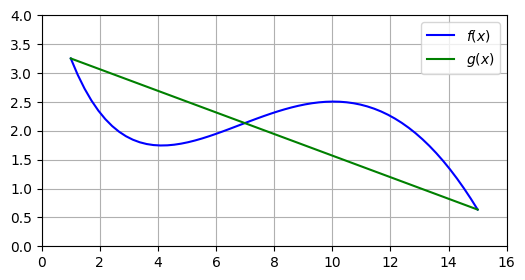

In [107]:
# plot given function and polynomial
plt.plot(x_axis, [f(x) for x in x_axis], label="$f(x)$", color="b")
plt.plot(x_axis, [g(x, R) for x in x_axis], label="$g(x)$", color="g")
plt.axis([0, 16, 0, 4])
plt.grid() # Отобразим сетку
plt.legend() # Отобразить легенду
plt.show()

Приблизим функцию $f$ в точках 1, 8 и 15 многочленом второй степени

$$
\left\{ 
\begin{align*} 
a_0 + a_1 x_1 + a_2 x_1 ^ 2 &=  f(x_1) \\ 
a_0 + a_1 x_2 + a_2 x_2 ^ 2 &=  f(x_2) \\
a_0 + a_1 x_3 + a_2 x_3 ^ 2 &=  f(x_3)
\end{align*}
\right.
$$
$$
\\ \ \\
\left\{ 
\begin{align*} 
a_0 + a_1 \cdot 1 + a_2 \cdot 1 ^ 2 &=  3.252 \\ 
a_0 + a_1 \cdot 8 + a_2 \cdot 8 ^ 2 &=  2.316 \\
a_0 + a_1 \cdot 15 + a_2 \cdot 15 ^ 2 &= 0.635
\end{align*}
\right.
\\ \ \\
\begin{pmatrix}
1 & 1 & 1^2 \\
1 & 8 & 8^2 \\
1 & 15 & 15^2 
\end{pmatrix} \cdot 
\begin{pmatrix}
a_0 \\
a_1 \\
a_2
\end{pmatrix} = 
\begin{pmatrix}
3.252\\
2.316 \\
0.635
\end{pmatrix}
\\ \ \\
A = \begin{pmatrix}
1 & 1 & 1^2 \\
1 & 8 & 8^2 \\
1 & 15 & 15^2 
\end{pmatrix}, \ 
b = \begin{pmatrix}
3.252\\
2.316 \\
0.635
\end{pmatrix}
$$

In [108]:
X = [1, 8, 15]  # точки, в которых аппроксимируется функция
n = len(X)  # degree of a polynomial
A, b = [], []  # matrices
for x in X:
    A.append([x ** i for i in range(n)])
    b.append([f(x)])
print("A =", A)
print("b =", b)

A = [[1, 1, 1], [1, 8, 64], [1, 15, 225]]
b = [[3.252216865271419], [2.316170159053224], [0.6352214195786656]]


In [109]:
# find coefficients:
R = solve(A, b)
R

array([[ 3.32512949],
       [-0.06531159],
       [-0.00760104]])

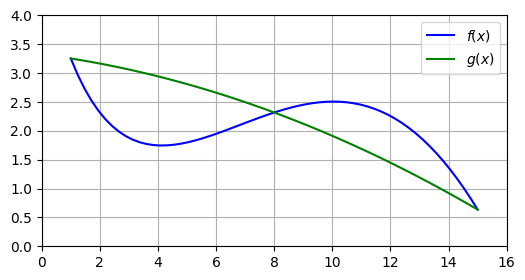

In [110]:
# plot given function and polynomial
plt.plot(x_axis, [f(x) for x in x_axis], label="$f(x)$", color="b")
plt.plot(x_axis, [g(x, R) for x in x_axis], label="$g(x)$", color="g")
plt.axis([0, 16, 0, 4])
plt.grid() # Отобразим сетку
plt.legend() # Отобразить легенду
plt.show()

Приблизим функцию $f$ в точках 1, 4, 10 и 15 многочленом третей степени

$$
\left\{ 
\begin{align*} 
a_0 + a_1 x_1 + a_2 x_1 ^ 2 + a_3 x_1 ^ 3 &=  f(x_1) \\ 
a_0 + a_1 x_2 + a_2 x_2 ^ 2 + a_3 x_2 ^ 3 &=  f(x_2) \\
a_0 + a_1 x_3 + a_2 x_3 ^ 2 + a_3 x_3 ^ 3 &=  f(x_3) \\
a_0 + a_1 x_4 + a_2 x_4 ^ 2 + a_3 x_4 ^ 3 &=  f(x_4)
\end{align*}
\right.
$$
$$
\\ \ \\
\left\{ 
\begin{align*} 
a_0 + a_1 \cdot 1 + a_2 \cdot 1 ^ 2 + a_3 \cdot 1 ^ 3 &= 3.252 \\ 
a_0 + a_1 \cdot 4 + a_2 \cdot 4 ^ 2 + a_3 \cdot 4 ^ 3 &= 1.747 \\
a_0 + a_1 \cdot 10 + a_2 \cdot 10 ^ 2 + a_3 \cdot 10 ^ 3 &= 2.505 \\
a_0 + a_1 \cdot 15 + a_2 \cdot 15 ^ 2 + a_3 \cdot 15 ^ 3 &= 0.635
\end{align*}
\right.
\\ \ \\
\begin{pmatrix}
1 & 1 & 1^2 & 1^3 \\
1 & 4 & 4^2 & 4^3 \\
1 & 10 & 10^2 & 10^3 \\
1 & 15 & 15^2 & 15^3 
\end{pmatrix} \cdot 
\begin{pmatrix}
a_0 \\
a_1 \\
a_2 \\
a_3
\end{pmatrix} = 
\begin{pmatrix}
3.252 \\
1.747 \\
2.505 \\
0.635
\end{pmatrix}
\\ \ \\
A = \begin{pmatrix}
1 & 1 & 1^2 & 1^3 \\
1 & 4 & 4^2 & 4^3 \\
1 & 10 & 10^2 & 10^3 \\
1 & 15 & 15^2 & 15^3 
\end{pmatrix}, \ 
b = \begin{pmatrix}
3.252 \\
1.747 \\
2.505 \\
0.635
\end{pmatrix}
$$

In [111]:
X = [1, 4, 10, 15]  # точки, в которых аппроксимируется функция
n = len(X)  # degree of a polynomial
A, b = [], []  # matrices
for x in X:
    A.append([x ** i for i in range(n)])
    b.append([f(x)])
print("A =", A)
print("b =", b)

A = [[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]]
b = [[3.252216865271419], [1.7468459495903677], [2.5054164070002463], [0.6352214195786656]]


In [112]:
# find coefficients:
R = solve(A, b)
R

array([[ 4.36264154],
       [-1.29552587],
       [ 0.19333685],
       [-0.00823565]])

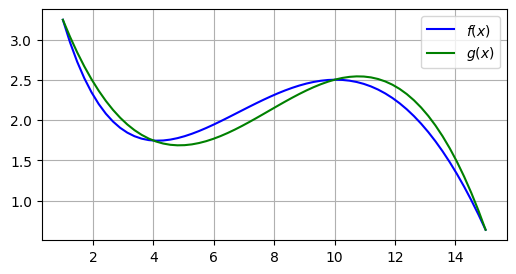

In [113]:
# plot given function and polynomial
plt.plot(x_axis, [f(x) for x in x_axis], label="$f(x)$", color="b")
plt.plot(x_axis, [g(x, R) for x in x_axis], label="$g(x)$", color="g")
plt.grid() # Отобразим сетку
plt.legend() # Отобразить легенду
plt.show()

Ответ: $(4.363,-1.296, 0.193, -0.008)$